<a href="https://colab.research.google.com/github/soumilsaha12/ML/blob/main/Fake_News_Classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification?resource=download")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: soumilsaha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification


100%|██████████| 92.1M/92.1M [00:01<00:00, 79.0MB/s]


Accuracy: 0.8687447581772435

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7081
           1       0.87      0.87      0.87      7227

    accuracy                           0.87     14308
   macro avg       0.87      0.87      0.87     14308
weighted avg       0.87      0.87      0.87     14308


Confusion Matrix:
[[6177  904]
 [ 974 6253]]


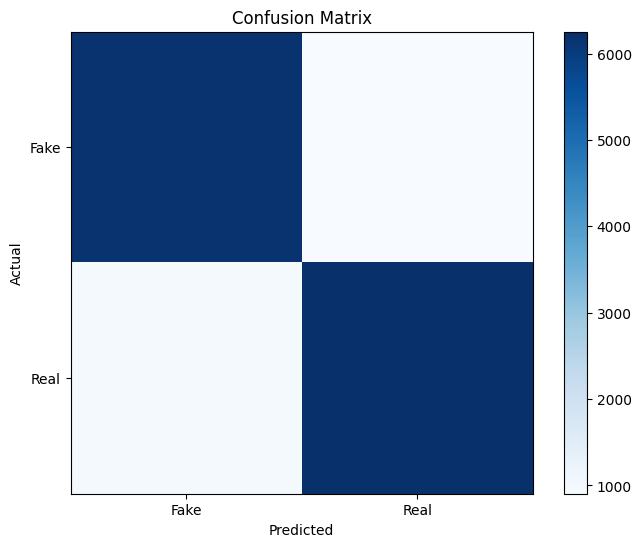

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv("/content/fake-news-classification/WELFake_Dataset.csv")  # Update with the correct file name

# Step 3: Handle missing values
data.dropna(inplace=True)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Step 5: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train.astype(str))
X_test_tfidf = vectorizer.transform(X_test.astype(str))

# Step 6: Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Step 7: Predict the labels for the test set
y_pred = classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 9: Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 10: Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Fake', 'Real'])
plt.yticks([0, 1], ['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Function to classify input text
def classify_news(input_text, vectorizer, classifier):
    # Vectorize input text using TF-IDF
        input_tfidf = vectorizer.transform([input_text])

                # Predict label using trained classifier
        predicted_label = classifier.predict(input_tfidf)

                            # Map predicted label to human-readable form
        label_mapping = {0: 'Fake', 1: 'Real'}
        predicted_label_human = label_mapping[predicted_label[0]]

        return predicted_label_human


input_text = input("Enter News for prediction: ")

                                            # Call the classification function
predicted_label = classify_news(input_text, vectorizer, classifier)

                                            # Print the predicted label
print("Predicted Label:", predicted_label)